# Task 3 Car Data

#Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.shape

(301, 9)

In [6]:
print('rows-->',data.shape[0])
print('columns-->',data.shape[1])

rows--> 301
columns--> 9


# DATA CLEANING

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data.duplicated().sum()

2

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [10]:
data.dropna()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# DATA PREPROCESSING

In [12]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Selling_type'] = label_encoder.fit_transform(data['Selling_type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])
data = data.drop(['Car_Name'], axis=1)

# EDA

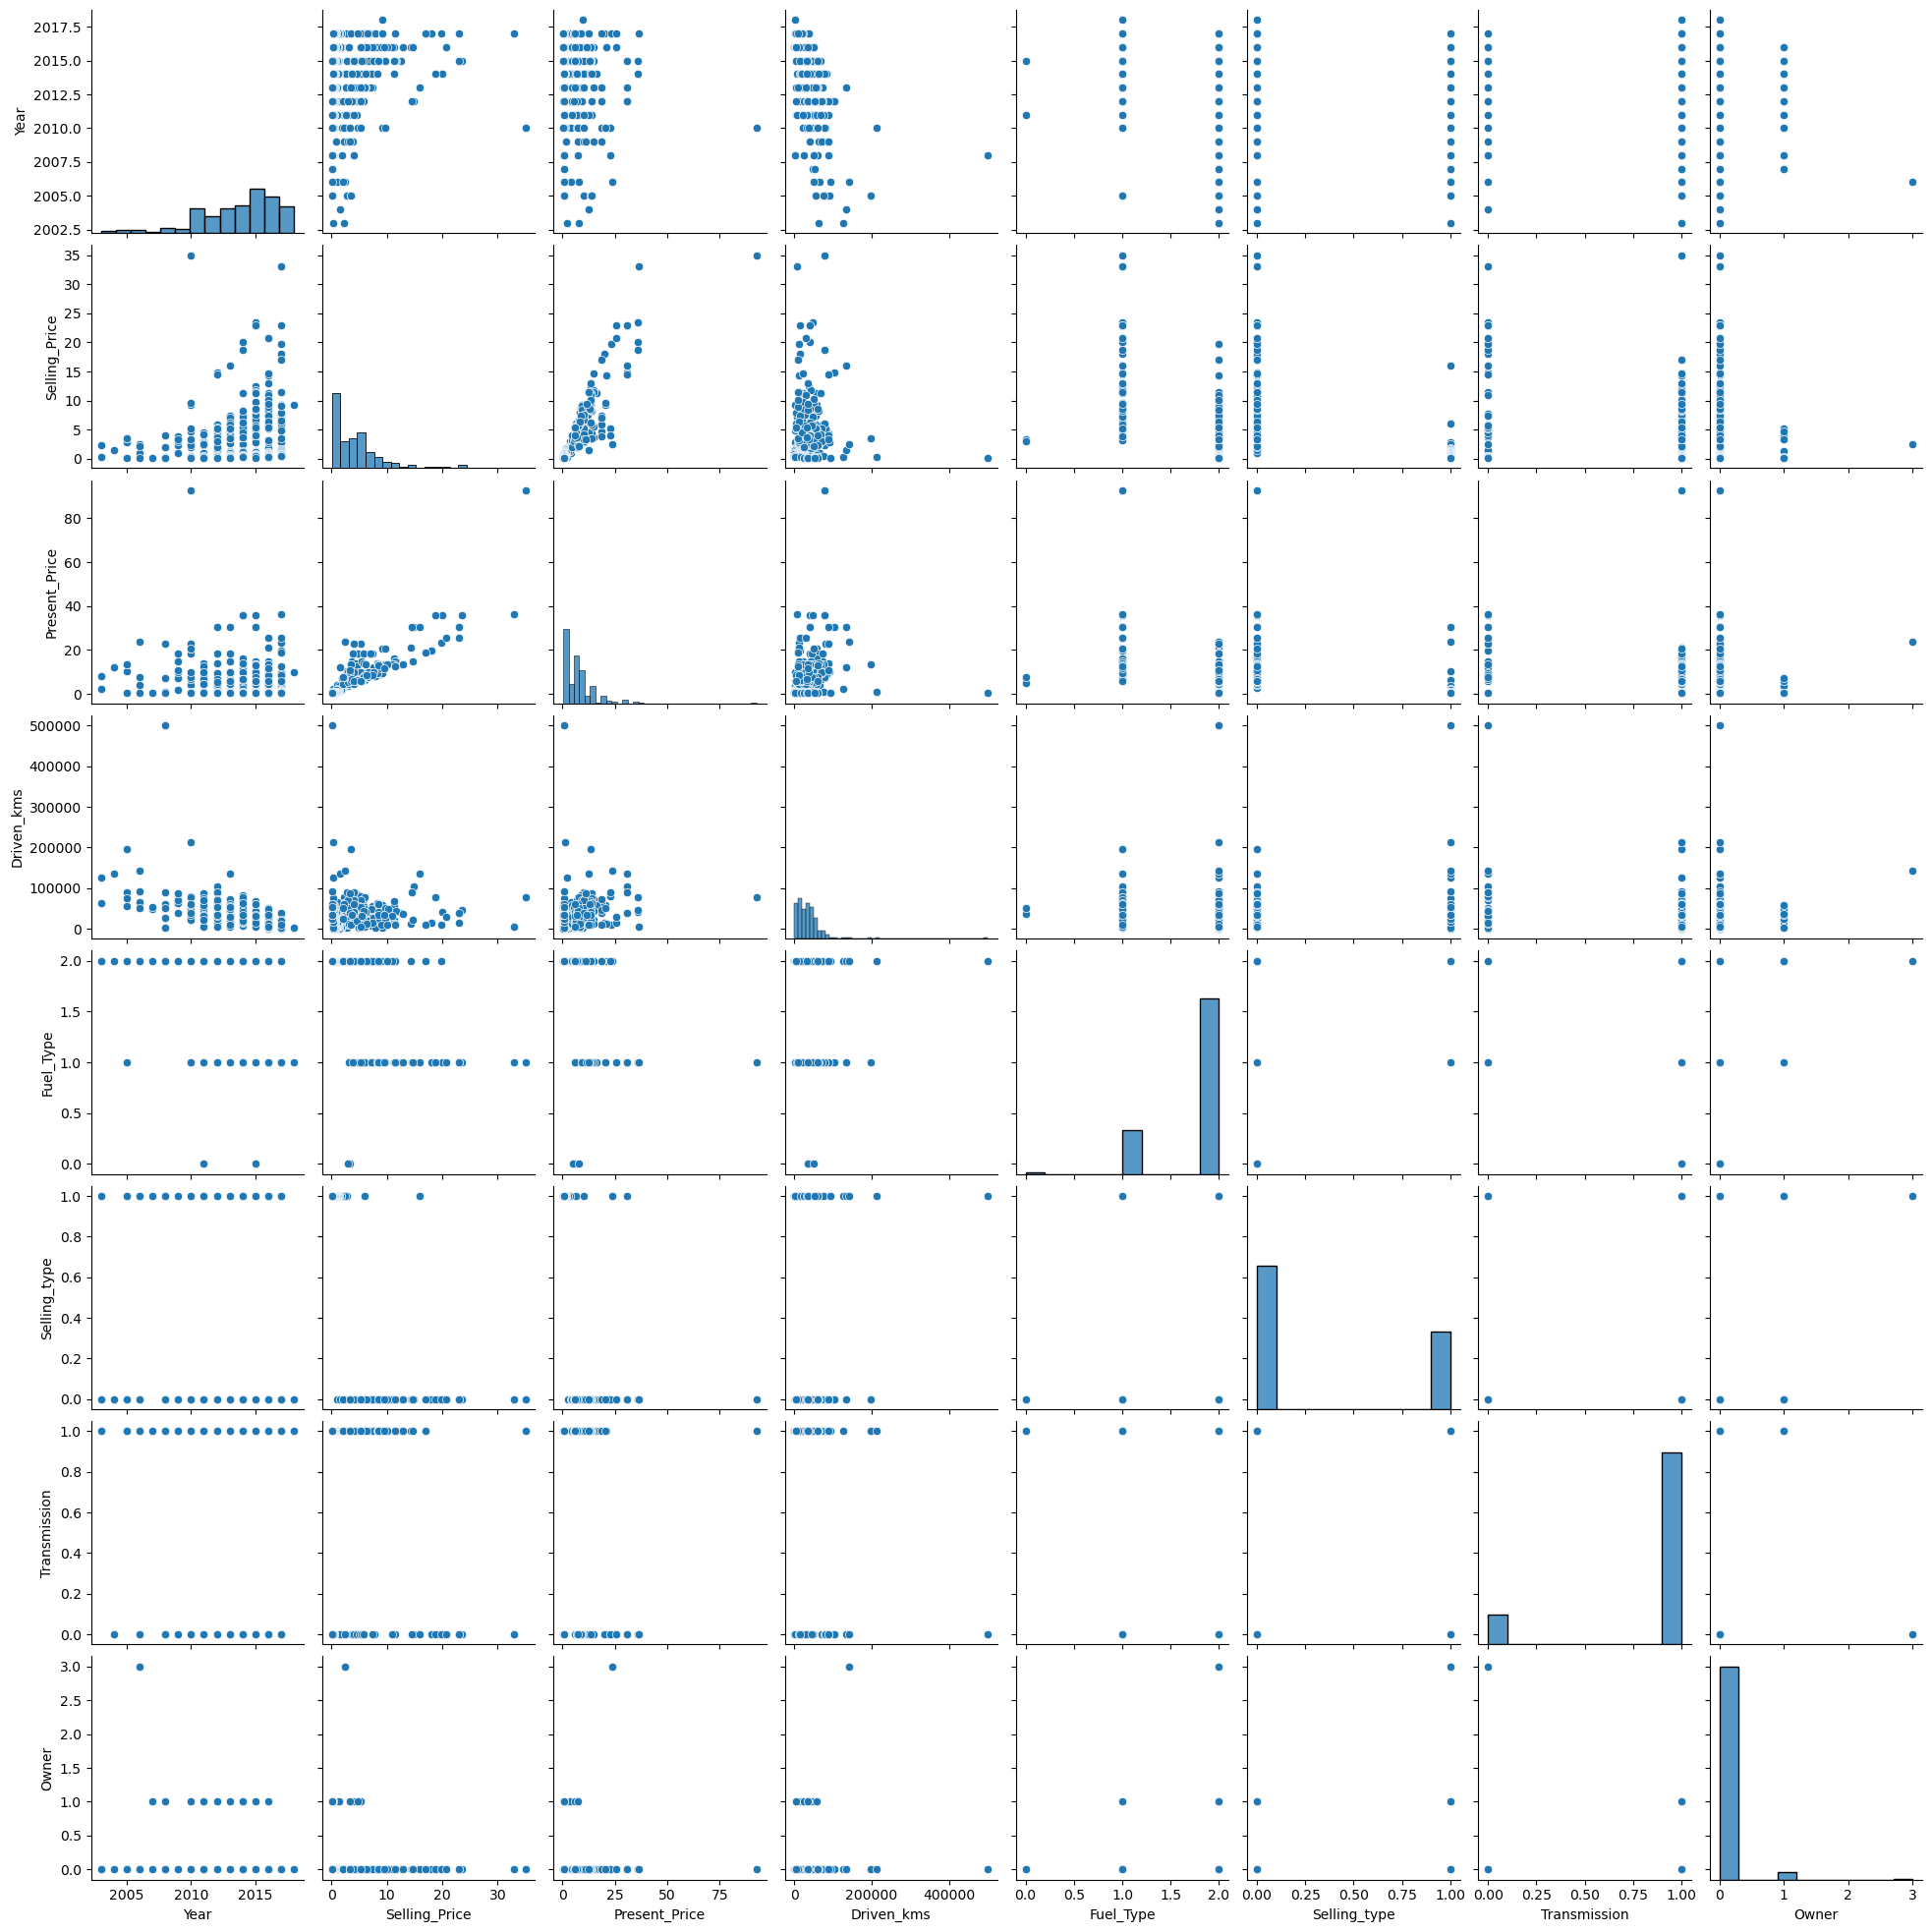

<Figure size 900x500 with 0 Axes>

In [13]:
import seaborn as sns
#A pairplot can show scatter plots of all numerical variables against each other and histograms along the diagonal
sns.pairplot(data)
plt.figure(figsize=(9, 5))
plt.show()

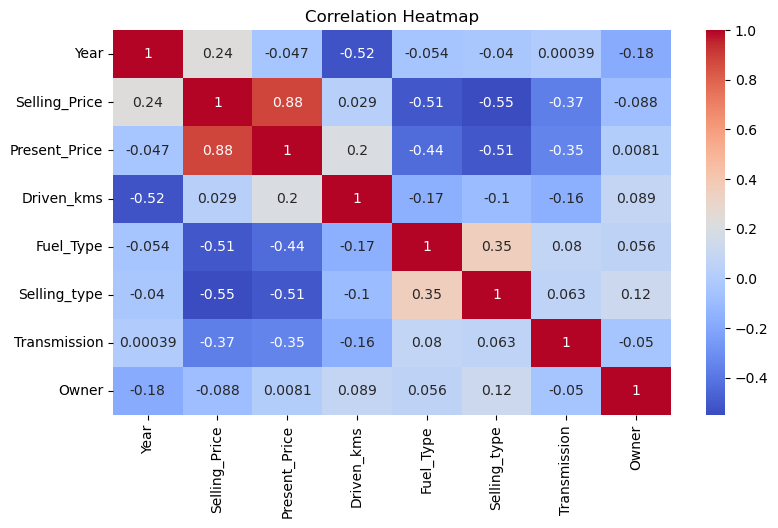

In [14]:
# Visualize the correlation between numerical variables
correlation_matrix = data.corr()
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

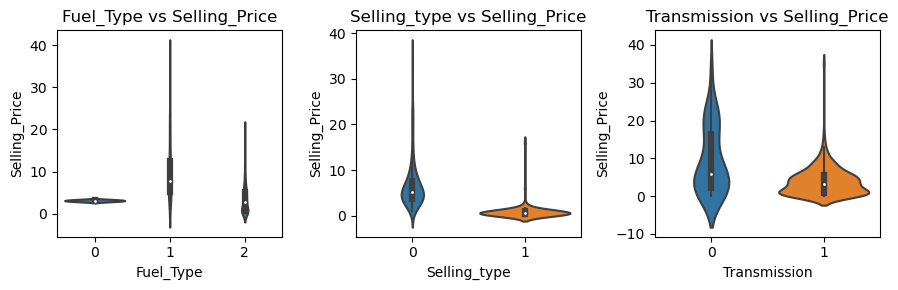

In [15]:
#Violin plots combine boxplots with kernel density estimation, providing a more detailed view of the distribution of numerical variables.
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
sns.violinplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title('Fuel_Type vs Selling_Price')
plt.subplot(1, 3, 2)
sns.violinplot(x='Selling_type', y='Selling_Price', data=data)
plt.title('Selling_type vs Selling_Price')
plt.subplot(1, 3, 3)
sns.violinplot(x='Transmission', y='Selling_Price', data=data)
plt.title('Transmission vs Selling_Price')
plt.tight_layout()
plt.show()

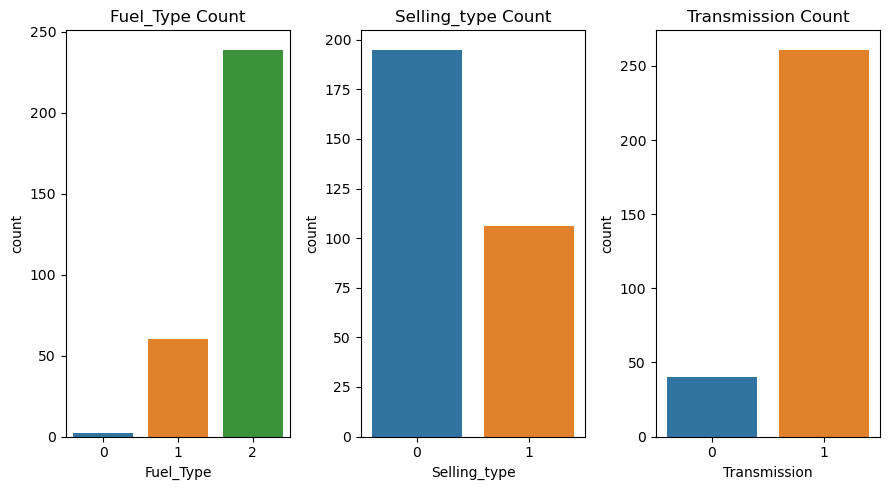

In [16]:
#Visualize the count of each category within categorical variables.
plt.figure(figsize=(9, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Fuel_Type', data=data)
plt.title('Fuel_Type Count')
plt.subplot(1, 3, 2)
sns.countplot(x='Selling_type', data=data)
plt.title('Selling_type Count')
plt.subplot(1, 3, 3)
sns.countplot(x='Transmission', data=data)
plt.title('Transmission Count')
plt.tight_layout()
plt.show()

# SPLITTING OF DATA

In [17]:
# Split the data into features and target
X = data.drop(['Selling_Price'], axis=1)
y = data['Selling_Price']

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize numerical features
scaler = StandardScaler()
X_train[['Year', 'Present_Price', 'Driven_kms', 'Owner']] = scaler.fit_transform(X_train[['Year', 'Present_Price', 'Driven_kms', 'Owner']])
X_test[['Year', 'Present_Price', 'Driven_kms', 'Owner']] = scaler.transform(X_test[['Year', 'Present_Price', 'Driven_kms', 'Owner']])

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [22]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.8672085577049173
R-squared (R2) Score: 0.9623535249586976
